In [1]:
#import functions
%run Grain_Area_Functions.ipynb
#create dataset
path = 'Data Files/EBSD Raw Data'
dataset=[]
#open all files
for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(filename, 'r') as f:
        #remove comments
        for line in f:
            if '#' not in line:
                break
        
        #load to np array and add to dataset
        data=np.loadtxt(filename, usecols=(0,1,2,3,4,8,9))
        dataset.append(data)

In [39]:
x=dataset[0] #testing
#slice raw data
raw_data=x
coords=raw_data[:,3:5] 
grain_IDs=raw_data[:,5]
grain_IDs_and_edges=raw_data[:,5:7]
coords_and_grains=raw_data[:,3:6]
coords_and_grains_copy=np.copy(coords_and_grains)
edge_grains=grain_IDs_and_edges[np.where(grain_IDs_and_edges[:,1]==1)]

#define p
count=grain_areas(coords,grain_IDs,return_p=True)
mean=np.mean(count)

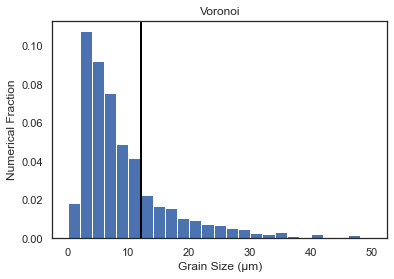

In [50]:
#Numerical Fraction
plt.title('Voronoi')
plt.ylabel('Numerical Fraction')
plt.xlabel('Grain Size (μm)')
plt.hist(count, bins=25, range=(0.01,50), density=True)
plt.axvline(mean,color='black',linewidth=2)

(array([0.00321126, 0.03539194, 0.04878129, 0.05595901, 0.04720287,
        0.04850234, 0.0314391 , 0.02654736, 0.02822783, 0.02143111,
        0.02158759, 0.01823345, 0.01864847, 0.01594747, 0.01421937,
        0.00919156, 0.00813021, 0.01198101, 0.00547004, 0.00194581,
        0.01012365, 0.00419778, 0.00439508, 0.00933444, 0.        ]),
 array([1.00000e-02, 2.00960e+00, 4.00920e+00, 6.00880e+00, 8.00840e+00,
        1.00080e+01, 1.20076e+01, 1.40072e+01, 1.60068e+01, 1.80064e+01,
        2.00060e+01, 2.20056e+01, 2.40052e+01, 2.60048e+01, 2.80044e+01,
        3.00040e+01, 3.20036e+01, 3.40032e+01, 3.60028e+01, 3.80024e+01,
        4.00020e+01, 4.20016e+01, 4.40012e+01, 4.60008e+01, 4.80004e+01,
        5.00000e+01]),
 <BarContainer object of 25 artists>)

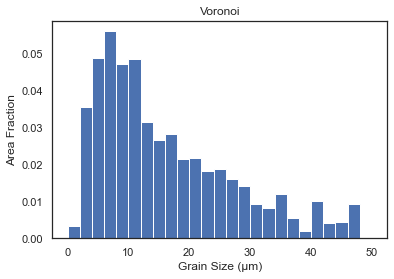

In [51]:
#Area Fraction
plt.title('Voronoi')
plt.ylabel('Area Fraction')
plt.xlabel('Grain Size (μm)')
plt.hist(count, bins=25, range=(0.01,50), density=True, weights=count)
# plt.axvline(mean,color='black',linewidth=2)

In [108]:
# #global variables
# global raw_data
# global coords
# global grain_IDs
# global grain_IDs_and_edges
# global coords_and_grains
# global coords_and_grains_copy
# global edge_grains
# global window_slice_list
# global p
# global percent
# # global 

#import functions
# %run Grain_Area_Functions.ipynb

In [7]:
#binary grid?
x=2
grid_sizes=[]
while x < 10000:
    grid_sizes.append(x)
    x*=2
    
print(grid_sizes)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]


In [3]:
#import functions
%run Grain_Area_Functions.ipynb

#how big is each file before pieces are removed?
#do we average files processed differently?
file_size=100000

#number of trials to avg
# num_trials=len(dataset)
num_trials=1

#number of points to sample
sizes=np.arange(1000,11000,1000)
percents=(sizes/file_size)*100

#six different sampling methods (random, square, hex, sobol, gold, window)
divergences=np.zeros((len(sizes),6))
means=np.zeros((len(sizes),6))
variances=np.zeros((len(sizes),6))

#store total means
total_means=[]
total_vars=[]

# for each file
# for x in dataset:
x=dataset[0] #testing
#tab***********
#slice raw data
raw_data=x
coords=raw_data[:,3:5] 
grain_IDs=raw_data[:,5]
grain_IDs_and_edges=raw_data[:,5:7]
coords_and_grains=raw_data[:,3:6]
coords_and_grains_copy=np.copy(coords_and_grains)
edge_grains=grain_IDs_and_edges[np.where(grain_IDs_and_edges[:,1]==1)]

#define p
start=time.time()
p,total_mean,total_var=grain_areas(coords,grain_IDs,return_p=True)
total_means.append(total_mean)
total_vars.append(total_var)
end=time.time()
# print(end-start)

#divergence for each method    
random_div=np.zeros(len(percents))
square_div=np.zeros(len(percents))
hex_div=np.zeros(len(percents))
sobol_div=np.zeros(len(percents))
gold_div=np.zeros(len(percents))
window_div=np.zeros(len(percents)) 
#mean for each method    
random_mean=np.zeros(len(percents))
square_mean=np.zeros(len(percents))
hex_mean=np.zeros(len(percents))
sobol_mean=np.zeros(len(percents))
gold_mean=np.zeros(len(percents))
window_mean=np.zeros(len(percents))
#var for each method    
random_var=np.zeros(len(percents))
square_var=np.zeros(len(percents))
hex_var=np.zeros(len(percents))
sobol_var=np.zeros(len(percents))
gold_var=np.zeros(len(percents))
window_var=np.zeros(len(percents))

index=0
for x in percents:
    # append divergences, mean, and variance
    random_div[index], random_mean[index], random_var[index] = sample(sizes[index],'random')
    square_div[index], square_mean[index], square_var[index] = sample(sizes[index],'square')
    hex_div[index], hex_mean[index], hex_var[index] = sample(sizes[index],'hex')
    sobol_div[index], sobol_mean[index], sobol_var[index] = sample(sizes[index],'sobol')
    gold_div[index], gold_mean[index], gold_var[index] = sample(sizes[index],'gold')
    window_div[index], window_mean[index], window_var[index] = sample(sizes[index],'window')
    index+=1

#add to array
divergences[:,0]+=random_div
divergences[:,1]+=square_div
divergences[:,2]+=hex_div
divergences[:,3]+=sobol_div
divergences[:,4]+=gold_div
divergences[:,5]+=window_div

means[:,0]+=random_mean
means[:,1]+=square_mean
means[:,2]+=hex_mean
means[:,3]+=sobol_mean
means[:,4]+=gold_mean
means[:,5]+=window_mean

variances[:,0]+=random_var
variances[:,1]+=square_var
variances[:,2]+=hex_var
variances[:,3]+=sobol_var
variances[:,4]+=gold_var
variances[:,5]+=window_var
    
#tab***********

# #average results        
divergences=divergences/num_trials
means=means/num_trials
variances=variances/num_trials
total_mean_avg=sum(total_means)/len(total_means)
total_var_avg=sum(total_vars)/len(total_vars)

#slice results
avg_random_div=divergences[:,0]
avg_hex_div=divergences[:,1]
avg_square_div=divergences[:,2]
avg_sobol_div=divergences[:,3]
avg_gold_div=divergences[:,4]
avg_window_div=divergences[:,5]

avg_random_mean=means[:,0]
avg_hex_mean=means[:,1]
avg_square_mean=means[:,2]
avg_sobol_mean=means[:,3]
avg_gold_mean=means[:,4]
avg_window_mean=means[:,5]

avg_random_var=variances[:,0]
avg_hex_var=variances[:,1]
avg_square_var=variances[:,2]
avg_sobol_var=variances[:,3]
avg_gold_var=variances[:,4]
avg_window_var=variances[:,5]

print(sample(len(raw_data),'random'))

(0.00687578699502164, 11.280447037701975, 603.9907352148792)


In [4]:
total_mean

12.05245421903052

In [2]:
# #import functions
# %run Grain_Area_Functions.ipynb

# #how big is each file before pieces are removed?
# #do we average files processed differently?
# file_size=100000

# #number of trials to avg
# # num_trials=len(dataset)
# num_trials=1

# #number of points to sample
# sizes=np.arange(1000,11000,1000)
# percents=(sizes/file_size)*100

# #six different sampling methods (random, square, hex, sobol, gold, window)
# divergences=np.zeros((len(sizes),6))
# means=np.zeros((len(sizes),6))
# variances=np.zeros((len(sizes),6))

# #store total means
# total_means=[]
# total_vars=[]

# # for each file
# # for x in dataset:
# x=dataset[0] #testing
# #tab***********
# #slice raw data
# raw_data=x
# coords=raw_data[:,3:5] 
# grain_IDs=raw_data[:,5]
# grain_IDs_and_edges=raw_data[:,5:7]
# coords_and_grains=raw_data[:,3:6]
# coords_and_grains_copy=np.copy(coords_and_grains)
# edge_grains=grain_IDs_and_edges[np.where(grain_IDs_and_edges[:,1]==1)]

# #define p
# start=time.time()
# p,total_mean,total_var=grain_areas(coords,grain_IDs,return_p=True)
# total_means.append(total_mean)
# total_vars.append(total_var)
# end=time.time()
# print(end-start)

# print(sample(5000,'random'))
# print(sample(len(raw_data),'random'))

In [16]:
percents_2=percents
#store dataset results
avg_random_mean_2=avg_random_mean
avg_hex_mean_2=avg_hex_mean
avg_square_mean_2=avg_square_mean
avg_sobol_mean_2=avg_sobol_mean
avg_gold_mean_2=avg_gold_mean
avg_window_mean_2=avg_window_mean
total_mean_avg_2=total_mean_avg
total_var_avg_2=total_var_avg

avg_random_div_2=avg_random_div
avg_hex_div_2=avg_hex_div
avg_square_div_2=avg_square_div
avg_sobol_div_2=avg_sobol_div
avg_gold_div_2=avg_gold_div
avg_window_div_2=avg_window_div

avg_random_var_2=avg_random_var
avg_hex_var_2=avg_hex_var
avg_square_var_2=avg_square_var
avg_sobol_var_2=avg_sobol_var
avg_gold_var_2=avg_gold_var
avg_window_var_2=avg_window_var

%store percents_2
#store dataset results
%store avg_random_mean_2
%store avg_hex_mean_2
%store avg_square_mean_2
%store avg_sobol_mean_2
%store avg_gold_mean_2
%store avg_window_mean_2
%store total_mean_avg_2
%store total_var_avg_2

%store avg_random_div_2
%store avg_hex_div_2
%store avg_square_div_2
%store avg_sobol_div_2
%store avg_gold_div_2
%store avg_window_div_2

%store avg_random_var_2
%store avg_hex_var_2
%store avg_square_var_2
%store avg_sobol_var_2
%store avg_gold_var_2
%store avg_window_var_2

In [9]:
actual_means=[]
actual_means.append(11.28)
%store actual_means

Stored 'actual_means' (list)


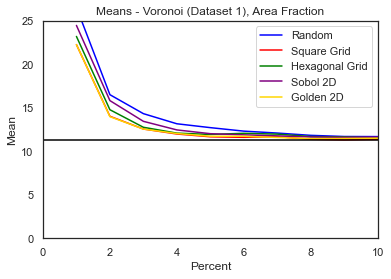

In [8]:
#view results
plt.xlim(0,10)
plt.ylim(0,25)
plt.title('Means - Voronoi (Dataset 1), Area Fraction')
plt.xlabel('Percent')
plt.ylabel('Mean')
sns.lineplot(percents,avg_random_mean,color='blue',label='Random')
sns.lineplot(percents,avg_square_mean,color='red',label='Square Grid')
sns.lineplot(percents,avg_hex_mean,color='green',label='Hexagonal Grid')
sns.lineplot(percents,avg_sobol_mean,color='purple',label='Sobol 2D')
sns.lineplot(percents,avg_gold_mean,color='gold',label='Golden 2D')
# sns.lineplot(percents,avg_window_mean,color='black',label='Window')
#total mean
# plt.axhline(y=1.05*total_mean, color='black',linestyle=':',label='Actual Mean')
plt.axhline(y=11.28, color='black',label='Actual Mean')

In [ ]:
#Show as error vs percent

In [11]:
avg_random_mean_error=(avg_random_mean-11.28)/11.28*100
avg_hex_mean_error=(avg_hex_mean-11.28)/11.28*100
avg_square_mean_error=(avg_square_mean-11.28)/11.28*100
avg_sobol_mean_error=(avg_sobol_mean-11.28)/11.28*100
avg_gold_mean_error=(avg_gold_mean-11.28)/11.28*100
avg_window_mean_error=(avg_window_mean-11.28)/11.28*100

<AxesSubplot:title={'center':'Percent Error of Means - Voronoi (Dataset 1), Area Fraction'}, xlabel='Percent Sampled', ylabel='Percent Error'>

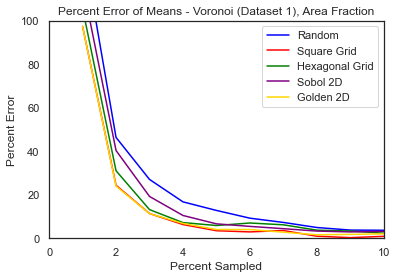

In [13]:
#view results
plt.xlim(0,10)
plt.ylim(0,100)
plt.title('Percent Error of Means - Voronoi (Dataset 1), Area Fraction')
plt.xlabel('Percent Sampled')
plt.ylabel('Percent Error')
sns.lineplot(percents,avg_random_mean_error,color='blue',label='Random')
sns.lineplot(percents,avg_square_mean_error,color='red',label='Square Grid')
sns.lineplot(percents,avg_hex_mean_error,color='green',label='Hexagonal Grid')
sns.lineplot(percents,avg_sobol_mean_error,color='purple',label='Sobol 2D')
sns.lineplot(percents,avg_gold_mean_error,color='gold',label='Golden 2D')
# sns.lineplot(percents,avg_window_mean_error,color='black',label='Window')

In [18]:
avg_random_mean_error_2=avg_random_mean_error
avg_hex_mean_error_2=avg_random_mean_error
avg_square_mean_error_2=avg_random_mean_error
avg_sobol_mean_error_2=avg_random_mean_error
avg_gold_mean_error_2=avg_random_mean_error
avg_window_mean_error_2=avg_random_mean_error

In [19]:
%store avg_random_mean_error_2
%store avg_hex_mean_error_2
%store avg_square_mean_error_2
%store avg_sobol_mean_error_2
%store avg_gold_mean_error_2
%store avg_window_mean_error_2

Stored 'avg_random_mean_error_2' (ndarray)
Stored 'avg_hex_mean_error_2' (ndarray)
Stored 'avg_square_mean_error_2' (ndarray)
Stored 'avg_sobol_mean_error_2' (ndarray)
Stored 'avg_gold_mean_error_2' (ndarray)
Stored 'avg_window_mean_error_2' (ndarray)


<AxesSubplot:title={'center':'Divergences - Voronoi (Dataset 1), Area Fraction'}, xlabel='Percent', ylabel='Divergence'>

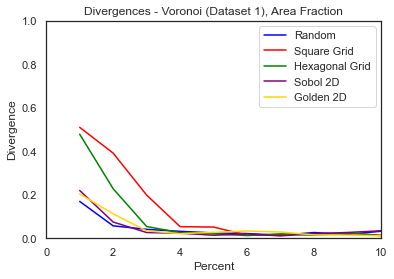

In [7]:
#view results
plt.xlim(0,10)
plt.ylim(0,1)
plt.title('Divergences - Voronoi (Dataset 1), Area Fraction')
plt.xlabel('Percent')
plt.ylabel('Divergence')
sns.lineplot(percents,avg_random_div,color='blue',label='Random')
sns.lineplot(percents,avg_square_div,color='red',label='Square Grid')
sns.lineplot(percents,avg_hex_div,color='green',label='Hexagonal Grid')
sns.lineplot(percents,avg_sobol_div,color='purple',label='Sobol 2D')
sns.lineplot(percents,avg_gold_div,color='gold',label='Golden 2D')
# sns.lineplot(percents,avg_window_div,color='black',label='Window')
#total mean
# plt.axhline(y=1.05*total_div, color='black',linestyle=':',label='Actual Mean')
# plt.axhline(y=total_div, color='black',label='Actual Mean')

In [54]:
#initialize lists, comment to prevent reinitializing
# random_mean_list=[]
# hex_mean_list=[]
# square_mean_list=[]
# sobol_mean_list=[]
# gold_mean_list=[]
# window_mean_list=[]
# mean_list=[]
# var_list=[]

In [ ]:
# # store overall results
# random_mean_list.append(avg_random_mean)
# hex_mean_list.append(avg_hex_mean)
# square_mean_list.append(avg_square_mean)
# sobol_mean_list.append(avg_sobol_mean)
# gold_mean_list.append(avg_gold_mean)
# window_mean_list.append(avg_window_mean)
# %store random_mean_list
# %store hex_mean_list
# %store square_mean_list
# %store sobol_mean_list
# %store gold_mean_list
# %store window_mean_list
# mean_list.append(total_mean_avg)
# var_list.append(total_var_avg)
# %store mean_list
# %store var_list

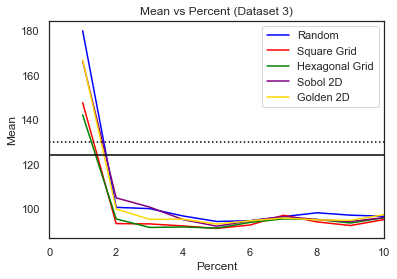

In [102]:
dataset_num=2
plt.xlim(0,10)
# plt.ylim(0,25)
plt.title('Mean vs Percent (Dataset '+str(dataset_num+1)+')')
plt.xlabel('Percent')
plt.ylabel('Mean')
sns.lineplot(percents,random_mean_list[dataset_num],color='blue',label='Random')
sns.lineplot(percents,square_mean_list[dataset_num],color='red',label='Square Grid')
sns.lineplot(percents,hex_mean_list[dataset_num],color='green',label='Hexagonal Grid')
sns.lineplot(percents,sobol_mean_list[dataset_num],color='purple',label='Sobol 2D')
sns.lineplot(percents,gold_mean_list[dataset_num],color='gold',label='Golden 2D')
# sns.lineplot(percents,avg_window_mean,color='black',label='Window')
#total mean
total_mean=p_list[dataset_num][1]
plt.axhline(y=1.05*total_mean, color='black',linestyle=':',label='Actual Mean')
plt.axhline(y=total_mean, color='black',label='Actual Mean')

In [11]:
x=dataset[2]
#slice raw data
raw_data=x
coords=raw_data[:,3:5] 
grain_IDs=raw_data[:,5]
grain_IDs_and_edges=raw_data[:,5:7]
coords_and_grains=raw_data[:,3:6]
coords_and_grains_copy=np.copy(coords_and_grains)
edge_grains=grain_IDs_and_edges[np.where(grain_IDs_and_edges[:,1]==1)]

In [15]:
sample(5000,'random')

(0.06972062087651772, 132.19338461538462, 90577.45063746747)

In [14]:
# grain_areas(coords,grain_IDs,return_p=True)

In [10]:
# #underestimates because of avg instead of 100% only!
# p_list=[]
# for x in dataset:
#     #slice raw data
#     raw_data=x
#     coords=raw_data[:,3:5] 
#     grain_IDs=raw_data[:,5]
#     grain_IDs_and_edges=raw_data[:,5:7]
#     coords_and_grains=raw_data[:,3:6]
#     coords_and_grains_copy=np.copy(coords_and_grains)
#     edge_grains=grain_IDs_and_edges[np.where(grain_IDs_and_edges[:,1]==1)]
#     p_list.append(grain_areas(coords,grain_IDs,return_p=True))
#     print(p_list)
# %store p_list

In [52]:
%store -r

In [76]:
# %store avg_random_div
# %store avg_hex_div
# %store avg_square_div
# %store avg_sobol_div
# %store avg_gold_div
# %store avg_window_div

# %store avg_random_var
# %store avg_hex_var
# %store avg_square_var
# %store avg_sobol_var
# %store avg_gold_var
# %store avg_window_var

In [63]:
# file_size=100000
# num_trials=len(dataset)

# #number of points to sample
# sizes=np.arange(1000,11000,1000)
# percents=(sizes/file_size)*100

# window_divergences=np.zeros(len(sizes))
# window_means=np.zeros(len(sizes))
# window_variances=np.zeros(len(sizes))

# # for each file
# for x in dataset:
#     #slice raw data
#     raw_data=x
#     coords=raw_data[:,3:5] 
#     grain_IDs=raw_data[:,5]
#     grain_IDs_and_edges=raw_data[:,5:7]
#     coords_and_grains=raw_data[:,3:6]
#     coords_and_grains_copy=np.copy(coords_and_grains)
#     edge_grains=grain_IDs_and_edges[np.where(grain_IDs_and_edges[:,1]==1)]
    
#     p=new_vor_p(25)

#     window_div=np.zeros(len(percents))
#     window_mean=np.zeros(len(percents))
#     window_var=np.zeros(len(percents))

#     index=0
#     for x in percents:
#         #calculates twice...
#         window_div[index]=sample(sizes[index],'window')
#         window_mean[index], window_var[index] = sample(sizes[index],'window',hist=False)
#         index+=1

#     window_divergences+=window_div
#     window_means+=window_mean
#     window_variances+=window_var

# #average results        
# window_divergences=window_divergences/num_trials
# window_means=window_means/num_trials
# window_variances=window_variances/num_trials

# %store window_divergences
# %store window_means
# %store window_variances

In [54]:
sizes=np.arange(1000,11000,1000)
percents=(sizes/len(raw_data))*100

In [68]:
percents_list=list(percents)
avg_random_div_list=list(avg_random_div)
avg_hex_div_list=list(avg_hex_div)
avg_square_div_list=list(avg_square_div)
avg_sobol_div_list=list(avg_sobol_div)
avg_gold_div_list=list(avg_gold_div)
avg_window_div_list=list(window_divergences)

percents_list.append(0)
avg_random_div_list.append(1)
avg_hex_div_list.append(1)
avg_square_div_list.append(1)
avg_sobol_div_list.append(1)
avg_gold_div_list.append(1)
avg_window_div_list.append(1)

<AxesSubplot:title={'center':'Grain Areas (10 Trials)'}, xlabel='Percent', ylabel='JS Divergence'>

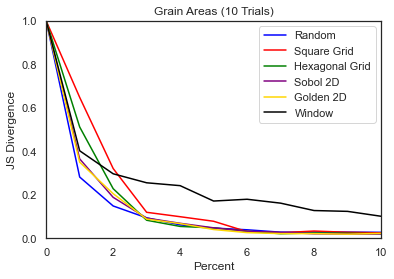

In [73]:
#plot JS results
plt.xlim(0,10)
plt.ylim(0,1)
plt.title('Grain Areas (10 Trials)')
plt.xlabel('Percent')
plt.ylabel('JS Divergence')
# sns.lineplot(percents,avg_random_div,color='blue',label='Random')
# sns.lineplot(percents,avg_square_div,color='red',label='Square Grid')
# sns.lineplot(percents,avg_hex_div,color='green',label='Hexagonal Grid')
# sns.lineplot(percents,avg_sobol_div,color='purple',label='Sobol 2D')
# sns.lineplot(percents,avg_gold_div,color='gold',label='Golden 2D')
# sns.lineplot(percents,window_divergences,color='black',label='Window')

sns.lineplot(percents_list,avg_random_div_list,color='blue',label='Random')
sns.lineplot(percents_list,avg_square_div_list,color='red',label='Square Grid')
sns.lineplot(percents_list,avg_hex_div_list,color='green',label='Hexagonal Grid')
sns.lineplot(percents_list,avg_sobol_div_list,color='purple',label='Sobol 2D')
sns.lineplot(percents_list,avg_gold_div_list,color='gold',label='Golden 2D')
sns.lineplot(percents_list,avg_window_div_list,color='black',label='Window')


# sns.lineplot(percents_list,avg_random_div,color='blue',label='Random')
# sns.lineplot(percents_list,avg_square_div,color='red',label='Square Grid')
# sns.lineplot(percents_list,avg_hex_div,color='green',label='Hexagonal Grid')
# sns.lineplot(percents_list,avg_sobol_div,color='purple',label='Sobol 2D')
# sns.lineplot(percents_list,avg_gold_div,color='gold',label='Golden 2D')

# sns.lineplot(percents,avg_window_div,color='black',label='Window')
# sns.lineplot(percents_2,avg_random_div,color='blue',label='Random')
# sns.lineplot(percents_2,avg_square_div,color='red',label='Square Grid')
# sns.lineplot(percents_2,avg_hex_div,color='green',label='Hexagonal Grid')
# sns.lineplot(percents_2,avg_sobol_div,color='purple',label='Sobol 2D')
# sns.lineplot(percents_2,avg_gold_div,color='gold',label='Golden 2D')
# # sns.lineplot(percents_2,avg_window_div,color='black',label='Window')

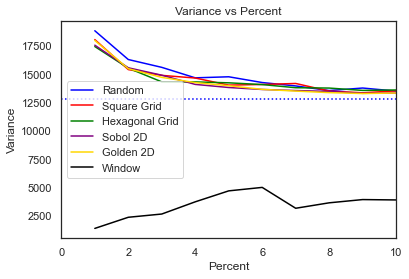

In [100]:
plt.xlim(0,10)
# plt.ylim(0,80)
plt.title('Variance vs Percent')
plt.xlabel('Percent')
plt.ylabel('Variance')
sns.lineplot(percents,avg_random_var,color='blue',label='Random')
sns.lineplot(percents,avg_square_var,color='red',label='Square Grid')
sns.lineplot(percents,avg_hex_var,color='green',label='Hexagonal Grid')
sns.lineplot(percents,avg_sobol_var,color='purple',label='Sobol 2D')
sns.lineplot(percents,avg_gold_var,color='gold',label='Golden 2D')
sns.lineplot(percents,window_variances,color='black',label='Window')
#total var
plt.axhline(y=total_var_avg, color='blue', linestyle=':',label='Actual Mean')

In [6]:
# #testing code
# file_size=100000

# #slice raw data
# raw_data=dataset[0]
# coords=raw_data[:,3:5] 
# grain_IDs=raw_data[:,5]
# grain_IDs_and_edges=raw_data[:,5:7]
# coords_and_grains=raw_data[:,3:6]
# coords_and_grains_copy=np.copy(coords_and_grains)
# edge_grains=grain_IDs_and_edges[np.where(grain_IDs_and_edges[:,1]==1)]

# #window slices
# window_slice_list=window_slices()

# #define p
# p=new_vor_p(25)

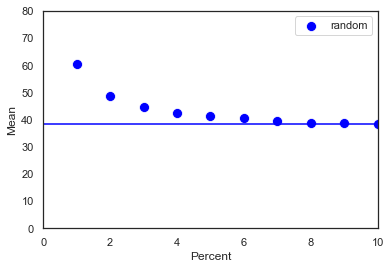

In [89]:
# #*****************
# method='random'
# mean=True
# #*****************

# #code
# if method == 'random':
#     avg_method_mean=avg_random_mean
#     avg_method_var=avg_random_var
    
# if method == 'square':
#     avg_method_mean=avg_square_mean
#     avg_method_var=avg_square_var
    
# if method == 'hex':
#     avg_method_mean=avg_hex_mean
#     avg_method_var=avg_hex_var
    
# if method == 'sobol':
#     avg_method_mean=avg_sobol_mean
#     avg_method_var=avg_hex_var
    
# if method == 'gold':
#     avg_method_mean=avg_gold_mean
#     avg_method_var=avg_gold_var
    
# if method == 'window':
#     avg_method_mean=avg_window_mean
#     avg_method_var=avg_window_var

# plt.xlim(0,10)

# if mean==True:
#     plt.ylim(0,80)
#     plt.xlabel('Percent')
#     plt.ylabel('Mean')
#     sns.scatterplot(percents, avg_method_mean, s=100, color="blue", marker="o", label=method)
    
# else: # var
#     plt.ylim(-50000,50000)
#     plt.xlabel('Percent')
#     plt.ylabel('Mean')
#     plt.errorbar(percents, avg_method_mean, yerr=avg_method_var, fmt='o', label=method)
# #     sns.scatterplot(percents, avg_method_var, s=100, color="blue", marker="o", label=method)

# #total mean
# plt.axhline(y=38.5, color='blue', linestyle='-',label='Actual Mean')